<a href="https://www.tamuc.edu"><img src="https://www.tamuc.edu/wp-content/uploads/2019/08/Stacked-ClearSpace.png" width="400" align="center"></a>

<h1><center>Malicious DNS Machine Learning Project</center></h1>


<h4>About this Notebook</h4>
In this notebook, we explore applying machine learning to suspicious DNS queries. This was done for TAMUC CSCI 333 Applied Data Analytics with Python as my final project.

Notebook format based on the one from [IBM ML0101EN - Machine Learning with Python: A Practical Introduction](https://learning.edx.org/course/course-v1:IBM+ML0101EN+3T2018/home)


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#understanding_data">Understanding the Data</a></li>
        <li><a href="#reading_data">Reading the data in</a></li>
        <li><a href="#data_exploration">Data Exploration</a></li>
        <li><a href="#simple_regression">Simple Regression Model</a></li>
    </ol>
</div>
<br>
<hr>

### Importing Needed packages

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Downloading Data
To download the data, we will use !wget to download it from the DOI

In [ ]:
!wget -O BenignAndMaliciousDataset.csv https://doi.org/10.17632/623sshkdrz.5


<h2 id="understanding_data">Understanding the Data</h2>

### `BenignAndMaliciousDataset.csv`:
We have downloaded a suspect DNS query dataset, **`BenignAndMaliciousDataset.csv`**, which contains DNS query statistics. [Dataset source](https://www.sciencedirect.com/science/article/pii/S2352340921006260)

- **Domain** e.g.
- **DNSRecordType** e.g.
- **MXDnsResponse** e.g.
- **TXTDnsResponse** e.g.
- **HasSPFInfo** e.g.
- **HasDkimInfo** e.g.
- **HasDmarcInfo** e.g.
- **Ip** e.g.
- **DomainInAlexaDB** e.g.
- **CommonPorts** e.g.
- **CountryCode** e.g.
- **RegisteredCountry** e.g.
- **CreationDate** e.g.
- **LastUpdateDate** e.g.
- **ASN** e.g.
- **HttpResponseCode** e.g.
- **RegisteredOrg** e.g.
- **SubdomainNumber** e.g.
- **Entropy** e.g.
- **EntropyOfSubDomains** e.g.
- **StrangeCharacters** e.g.
- **TLD** e.g.
- **IpReputation** e.g.
- **DomainReputation** e.g.
- **ConsonantRatio** e.g.
- **NumericRatio** e.g.
- **SpecialCharRatio** e.g.
- **VowelRatio** e.g.
- **ConsonantSequence** e.g.
- **VowelSequence** e.g.
- **NumericSequence** e.g.
- **SpecialCharSequence** e.g.
- **DomainLength** e.g.
- **Class** e.g.


<h2 id="reading_data">Reading the data in</h2>

In [3]:
df = pd.read_csv("BenignAndMaliciousDataset.csv")

# take a look at the dataset
df.head()

,Domain,DNSRecordType,MXDnsResponse,TXTDnsResponse,HasSPFInfo,HasDkimInfo,HasDmarcInfo,Ip,DomainInAlexaDB,CommonPorts,...,ConsonantRatio,NumericRatio,SpecialCharRatio,VowelRatio,ConsonantSequence,VowelSequence,NumericSequence,SpecialCharSequence,DomainLength,Class
0,4455,A,False,False,False,False,False,16984,False,False,...,0.6,0.1,0.0,0.2,10,4,1,0,134,1
1,4456,A,False,False,False,False,False,16984,False,False,...,0.7,0.1,0.0,0.2,12,2,2,1,123,1
2,4457,A,False,False,False,False,False,16984,False,False,...,0.6,0.2,0.0,0.2,16,2,3,0,150,1
3,4458,A,False,False,False,False,False,16984,False,False,...,0.6,0.1,0.0,0.1,9,1,2,0,122,1
4,4459,A,False,False,False,False,False,16984,False,False,...,0.6,0.2,0.0,0.1,10,2,2,0,151,1


<h2 id="data_exploration">Data Exploration</h2>
Lets first have a descriptive exploration on our data.

In [4]:
# summarize the data
df.describe()

,Domain,Ip,CreationDate,LastUpdateDate,ASN,HttpResponseCode,SubdomainNumber,Entropy,EntropyOfSubDomains,StrangeCharacters,ConsonantRatio,NumericRatio,SpecialCharRatio,VowelRatio,ConsonantSequence,VowelSequence,NumericSequence,SpecialCharSequence,DomainLength,Class
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,44999.500000,13479.648033,1.933611,2.365744,23335.808167,0.667033,103.069200,2.866844,0.003178,3.498011,0.459519,0.144281,0.006526,0.261528,2.719222,1.342756,1.516478,0.112378,26.440422,0.500000
std,25980.906451,4160.266410,1.997232,1.935509,37004.865724,1.203285,4243.802846,0.488291,0.081042,4.471591,0.146031,0.147331,0.026162,0.098600,1.699339,0.554527,1.538932,0.431967,22.341135,0.500003
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,22499.750000,11709.750000,0.000000,0.000000,-1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.200000,2.000000,1.000000,0.000000,0.000000,15.000000,0.000000
50%,44999.500000,14626.000000,0.000000,4.000000,26228.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.500000,0.100000,0.000000,0.200000,2.000000,1.000000,1.000000,0.000000,24.000000,0.500000
75%,67499.250000,16984.000000,4.000000,4.000000,26228.000000,2.000000,57.000000,3.000000,0.000000,7.000000,0.600000,0.300000,0.000000,0.300000,3.000000,2.000000,3.000000,0.000000,31.000000,1.000000
max,89999.000000,16984.000000,4.000000,4.000000,398108.000000,5.000000,661909.000000,5.000000,3.000000,124.000000,1.000000,0.800000,0.900000,0.800000,37.000000,7.000000,45.000000,61.000000,153.000000,1.000000


Lets select some features to explore more.

In [11]:
cdf = df[['Domain', 'DNSRecordType', 'MXDnsResponse', 'TXTDnsResponse', 'HasSPFInfo', 'HasDkimInfo', 'HasDmarcInfo', 'Ip', 'DomainInAlexaDB', 'CommonPorts', 'CountryCode', 'RegisteredCountry', 'CreationDate', 'LastUpdateDate', 'ASN', 'HttpResponseCode', 'RegisteredOrg', 'SubdomainNumber', 'Entropy', 'EntropyOfSubDomains', 'StrangeCharacters', 'TLD', 'IpReputation', 'DomainReputation', 'ConsonantRatio', 'NumericRatio', 'SpecialCharRatio', 'VowelRatio', 'ConsonantSequence', 'VowelSequence', 'NumericSequence', 'SpecialCharSequence', 'DomainLength', 'Class']]
cdf.head(9)

,Domain,DNSRecordType,MXDnsResponse,TXTDnsResponse,HasSPFInfo,HasDkimInfo,HasDmarcInfo,Ip,DomainInAlexaDB,CommonPorts,...,ConsonantRatio,NumericRatio,SpecialCharRatio,VowelRatio,ConsonantSequence,VowelSequence,NumericSequence,SpecialCharSequence,DomainLength,Class
0,4455,A,False,False,False,False,False,16984,False,False,...,0.6,0.1,0.0,0.2,10,4,1,0,134,1
1,4456,A,False,False,False,False,False,16984,False,False,...,0.7,0.1,0.0,0.2,12,2,2,1,123,1
2,4457,A,False,False,False,False,False,16984,False,False,...,0.6,0.2,0.0,0.2,16,2,3,0,150,1
3,4458,A,False,False,False,False,False,16984,False,False,...,0.6,0.1,0.0,0.1,9,1,2,0,122,1
4,4459,A,False,False,False,False,False,16984,False,False,...,0.6,0.2,0.0,0.1,10,2,2,0,151,1
5,4460,A,False,False,False,False,False,16984,False,False,...,0.6,0.1,0.0,0.2,9,2,2,0,149,1
6,4461,A,True,False,True,False,False,11562,False,False,...,0.5,0.0,0.0,0.4,1,2,1,0,28,1
7,4462,A,False,False,False,False,False,16984,False,False,...,0.7,0.1,0.0,0.2,10,2,2,1,131,1
8,4463,A,False,False,False,False,False,6808,False,True,...,0.5,0.0,0.0,0.4,3,2,1,0,22,1


we can plot each of these features:

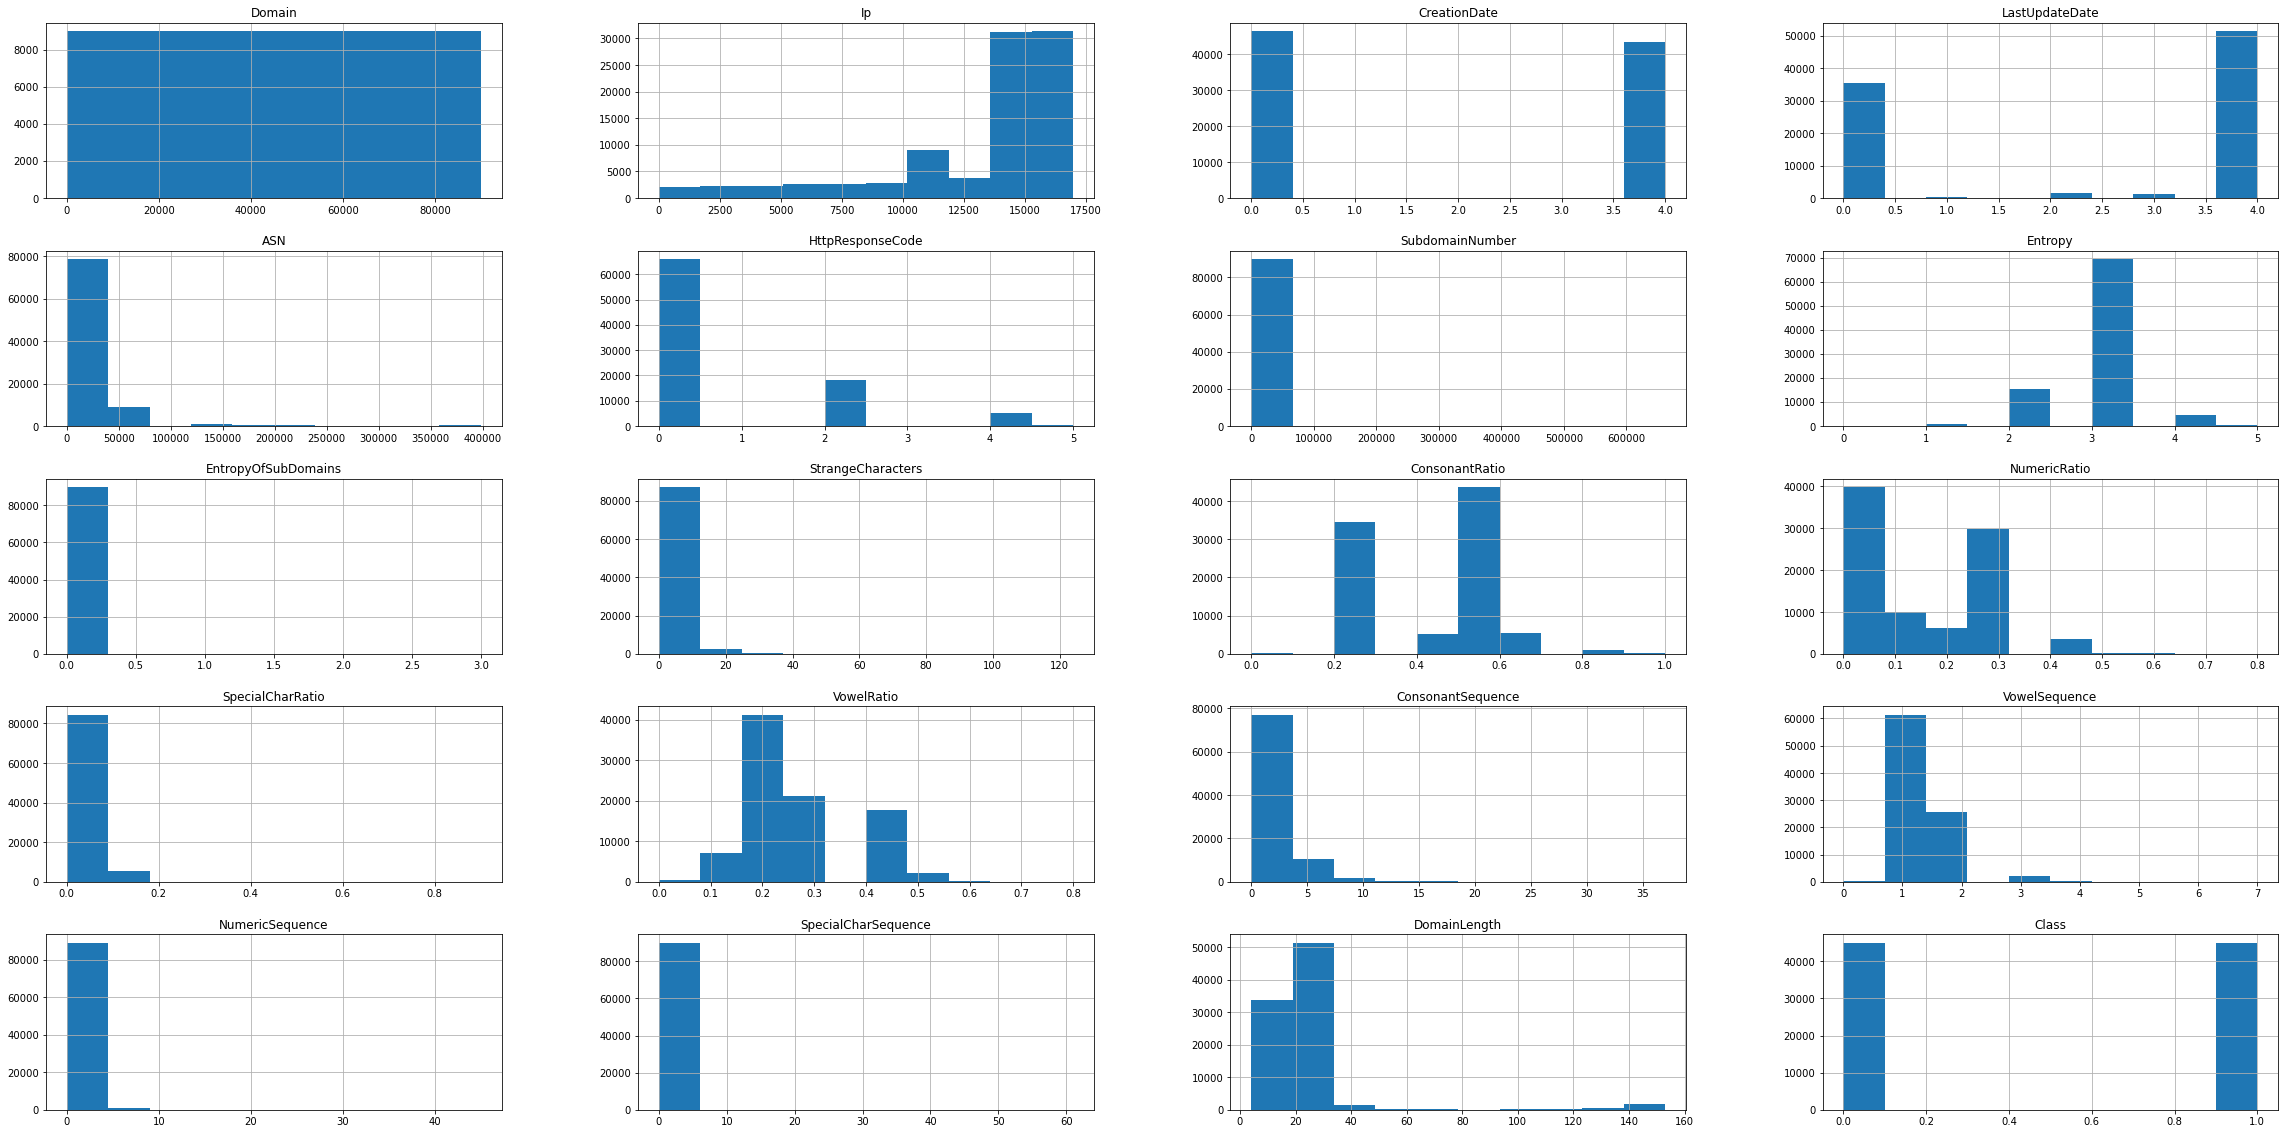

In [23]:
viz = cdf[['Domain', 'DNSRecordType', 'MXDnsResponse', 'TXTDnsResponse', 'HasSPFInfo', 'HasDkimInfo', 'HasDmarcInfo', 'Ip', 'DomainInAlexaDB', 'CommonPorts', 'CountryCode', 'RegisteredCountry', 'CreationDate', 'LastUpdateDate', 'ASN', 'HttpResponseCode', 'RegisteredOrg', 'SubdomainNumber', 'Entropy', 'EntropyOfSubDomains', 'StrangeCharacters', 'TLD', 'IpReputation', 'DomainReputation', 'ConsonantRatio', 'NumericRatio', 'SpecialCharRatio', 'VowelRatio', 'ConsonantSequence', 'VowelSequence', 'NumericSequence', 'SpecialCharSequence', 'DomainLength', 'Class']]
viz.hist(figsize=(40,20))
plt.show()

Now, lets plot each of these features vs the malicious/benign indicator, to see how linear is their relation:

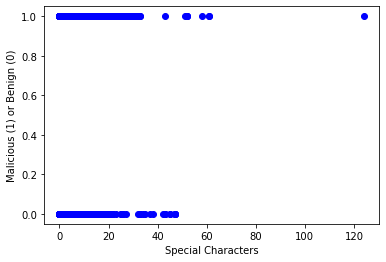

In [25]:
plt.scatter(cdf.StrangeCharacters, cdf.Class,  color='blue')
plt.xlabel("Special Characters")
plt.ylabel("Malicious (1) or Benign (0)")
plt.show()

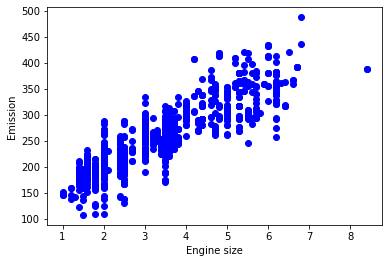

Showing values where engine size is 3


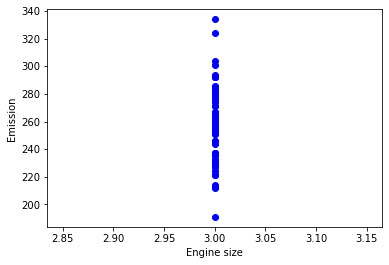

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
26,3.0,6,10.9,251
27,3.0,6,8.3,224
28,3.0,6,11.2,258
29,3.0,6,8.3,224
30,3.0,6,11.2,258
32,3.0,6,8.4,227
33,3.0,6,11.2,258
36,3.0,6,8.5,230
39,3.0,6,11.2,258


In [19]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

print("Showing values where engine size is 3")
rslt_df = cdf[cdf['ENGINESIZE'] == 3]
plt.scatter(rslt_df.ENGINESIZE, rslt_df.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()
rslt_df.head(9)

## Practice
plot __CYLINDER__ vs the Emission, to see how linear is their relation:

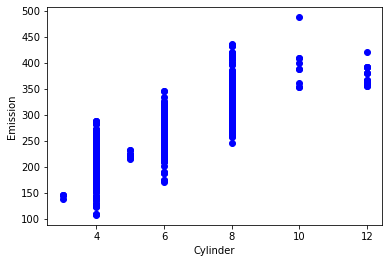

In [22]:

plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinder")
plt.ylabel("Emission")
plt.show()


Double-click __here__ for the solution.

<!-- Your answer is below:
    
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

-->

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using __np.random.rand()__ function: 

In [29]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

<h2 id="simple_regression">Simple Regression Model</h2>
Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

#### Train data distribution

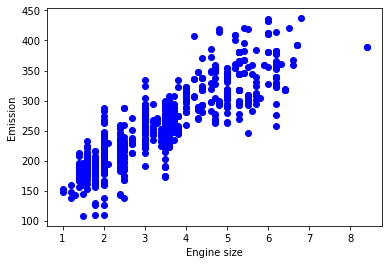

In [30]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Modeling
Using sklearn package to model data.

In [31]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.68308879]]
Intercept:  [126.85105231]


As mentioned before, __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.


#### Plot outputs

we can plot the fit line over the data:

Text(0, 0.5, 'Emission')

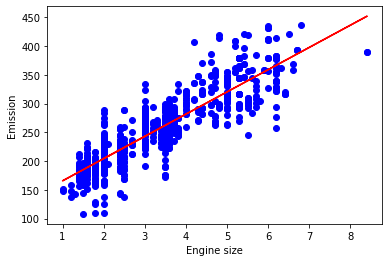

In [56]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.</li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
    <li> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
</ul>

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )